### 1. import libraries

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


### 2. Load data

In [22]:
# load data
df = pd.read_csv('../Resources/cleaned_employees.csv')


In [19]:
df.dtypes

EmpID                      int64
Gender                    object
Age                        int64
MaritalStatus             object
JobLevel                  object
Experience                 int64
Dept                      object
EmpType                   object
WLB                        int64
WorkEnv                    int64
PhysicalActivityHours    float64
Workload                   int64
Stress                     int64
SleepHours               float64
CommuteMode               object
CommuteDistance            int64
NumCompanies               int64
TeamSize                   int64
NumReports                 int64
EduLevel                  object
haveOT                      bool
TrainingHoursPerYear     float64
JobSatisfaction            int64
dtype: object

### 3. Initialize random forest model

In [27]:
# Define all features and target
features = ["Workload", "Stress", "SleepHours"]

target = "JobSatisfaction"

# Extract X and y
x = df[features]  # Features
y = df[target]    # Target

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.7867529270463214
R-squared: -0.1229768299410614


## first output
### MSE = 1.786 indicates this model has poor peformance.
### R-squared values = -0.122 means this model performs worse than a simple horizontal line.

In [28]:
print(f"features shape: {x.shape}")
print(f"target shape: {y.shape}")

features shape: (3007, 3)
target shape: (3007,)


In [ ]:
# Apply Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter space (adapting to the style shown in your slide)
hyperparameters = {
    'n_estimators': randint(100, 500),               # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                 # Maximum depth of each tree
    'min_samples_split': randint(2, 11),             # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 5),               # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt'],                # Number of features to consider when looking for the best split
}

# Set up the RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=hyperparameters, n_iter=50, cv=5, random_state=42, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)

# Use the best estimator to make predictions
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

# Evaluate the model with best hyperparameters
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')




## Second output
### Best Hyperparameters:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

### MSE =1.538 
### -> that it minimuze the error but still not good enough.

### R-squared: 0.033 
### -> means only 3.3% of hte variance in JobSatisfaction is explained by our features. 

## Conclusion
### possible causes:  less features to predict JobSatisfaction, or the model is not suitable for this dataset.

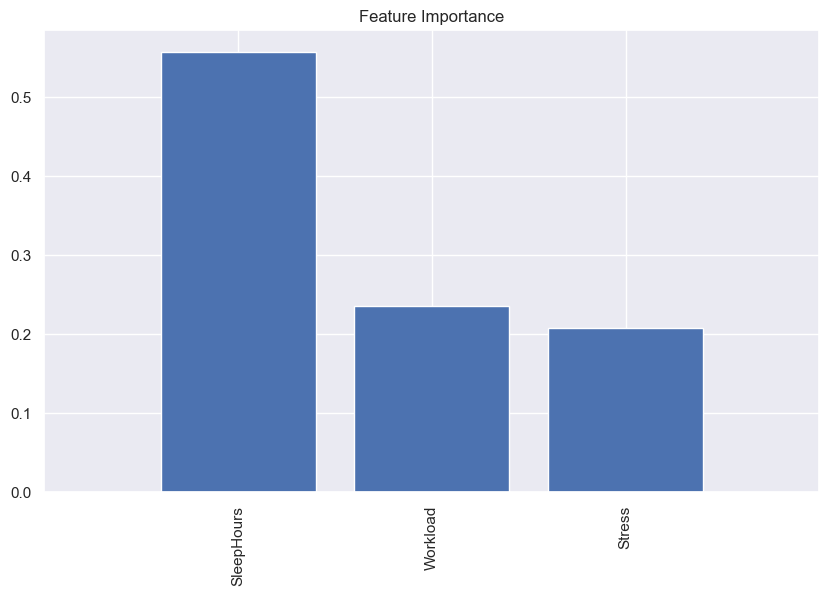

In [30]:

import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = rf_regressor.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), [x_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()
